<font color='blue'> please import packages below before starting </font>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

# Simple Linear Regression

## Artificial simple regression dataset

First, let's generate a simple regression problem. <br>
Function __make_regression__ generates a random linear regression model <br>
where it returns input, corresponding output, and coefficients for the underlying function.

parameters: n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=1

In [2]:
X, y, coef = make_regression(n_samples=100, n_features=1, bias=100, noise=10, coef=True, random_state=1)

Take a look of what we've got:

In [3]:
# Check the dataset
print("X : " + str(X))
print("y : " + str(y))
print(X.shape, y.shape)

X : [[-0.61175641]
 [-0.24937038]
 [ 0.48851815]
 [ 0.76201118]
 [ 1.51981682]
 [ 0.37756379]
 [ 0.51292982]
 [-0.67124613]
 [-1.39649634]
 [ 0.31563495]
 [-0.63699565]
 [-0.39675353]
 [-1.10061918]
 [ 0.90085595]
 [-1.09989127]
 [ 0.82797464]
 [-0.07557171]
 [-0.35224985]
 [-0.67066229]
 [-1.07296862]
 [-0.30620401]
 [ 2.18557541]
 [ 0.86540763]
 [ 0.19829972]
 [-0.38405435]
 [-0.68372786]
 [ 0.05080775]
 [ 0.58281521]
 [ 1.25286816]
 [-0.75439794]
 [-0.34934272]
 [-0.88762896]
 [ 0.18656139]
 [ 0.87616892]
 [ 0.83898341]
 [-0.50446586]
 [-0.34385368]
 [ 1.6924546 ]
 [-2.3015387 ]
 [ 0.93110208]
 [ 2.10025514]
 [ 1.46210794]
 [-0.84520564]
 [-0.87785842]
 [-0.3224172 ]
 [ 0.88514116]
 [ 0.16003707]
 [ 1.13162939]
 [-0.37528495]
 [ 0.50249434]
 [-0.20889423]
 [ 0.12015895]
 [ 0.58662319]
 [ 0.3190391 ]
 [-0.69166075]
 [ 0.69803203]
 [ 1.19891788]
 [-0.20075807]
 [ 0.53035547]
 [ 0.74204416]
 [ 0.41005165]
 [ 0.11900865]
 [-0.7612069 ]
 [ 0.42349435]
 [ 0.30017032]
 [-1.1425182 ]
 [ 0.1

We can visualize our data with the package __matplotlib__ which we call as __plt__. The function __scatter__ literally shows a scatter plot.

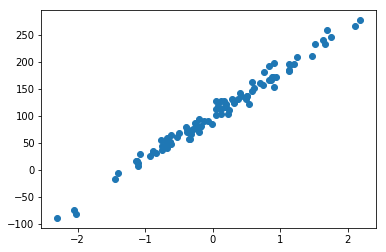

In [4]:
plt.scatter(X, y)

To evaluate the model that we would acquire in later steps, we should split the dataset. <br>
Again, there are predefined functions that help us get through by simpling calling. <br>
__train_test_split__ tear the data apart into two - training dataset and test dataset(note that we should define the test_size!)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

and we have class variable called __LinearRegression__ that generates ordinary least squares linear regression. <br>
State the class variable, call function __fit()__ that literally fits the model to the given data. <br>
For each function, please take a careful look at what they have as parameters!

In [6]:
# Generate linear regression class object
regressor = linear_model.LinearRegression()

# Train linear regression model with training dataset
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Now that we have our fitted function, let's compute the prediction for the test dataset. <br>
As an input, we should have X_test.

In [7]:
# Predict the test dataset
y_pred = regressor.predict(X_test)

Let's check what our function is:

In [8]:
# The coefficients
print("Coefficients: \n", regressor.coef_)
print("Intercept: \n", regressor.intercept_)

Coefficients: 
 [81.34306536]
Intercept: 
 102.14114424158028


We can provide a numerical measure for the evaluation of the model. <br>
In this problem, we can comput MSE(mean squared error) and coefficient of determination(square of correlation r).

In [9]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 96.62
Coefficient of determination: 0.98


### y = 81.343x + 102.141

We can check whether our function really fits the model! <br>
Remember that we have used __plt__ in the previous steps for the visualization. <br>
Let's plot the data and the function.

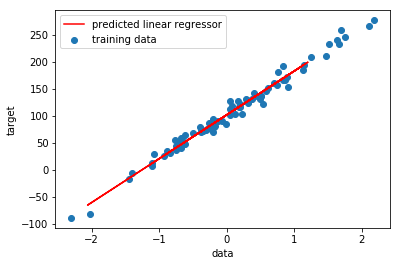

In [10]:
# Scatter the training dataset & Plot predicted linear regression model
plt.scatter(X_train, y_train, label='training data')
plt.plot(X_test, y_pred, label='predicted linear regressor', color='red')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()

Our function is obtained with the _training dataset_. Now, evaluate the function with our _test dataset_. <br>
We have already made a prediction above as __y_pred__. <br>
Let's plot and see:

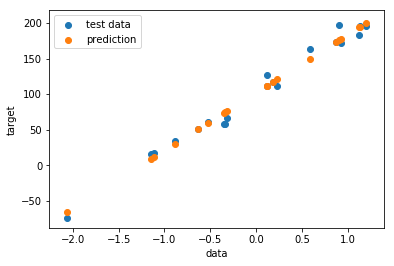

In [11]:
# Compare the actual and predicted targets
plt.scatter(X_test, y_test, label='test data')
plt.scatter(X_test, y_pred, label='prediction')
plt.xlabel('data')
plt.ylabel('target')
plt.legend()

# Multiple Linear Regression

## California housing dataset

In this section, we are extending our problem from simple to multiple linear regression. <br>
That means we are searching for a function that has more than one predictor(e.g. x variables)

The steps are exactly the same. <br>
The only difference is that the data has different number of features.

In [12]:
# Load the california housing dataset
dataset = datasets.fetch_california_housing()
X, y = dataset.data , dataset.target

# Check the dataset
print(X.shape, y.shape)

(20640, 8) (20640,)


In [13]:
# Split the data and target into training dataset and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
# Create Linear regression object
regressor = linear_model.LinearRegression()

# Train the model using the training sets
regressor.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regressor.predict(X_test)

In [15]:
# The coefficients
print("Coefficients: \n", regressor.coef_)
print("Intercept: \n", regressor.intercept_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [ 4.38565392e-01  9.68722037e-03 -1.04705005e-01  6.32189474e-01
 -3.67690711e-06 -3.44771323e-03 -4.25964056e-01 -4.40601114e-01]
Intercept: 
 -37.515754159836604
Mean squared error: 0.53
Coefficient of determination: 0.60


#### y = 0.439x1 + 0.0097x2 - 0.105x3 + 0.631x4 - 0.0000037x5 - 0.0034x6 - 0.426x7 - 0.441x8 - 37.5

Again, let's plot our predicted values so that we can check the performance. <br>
__pd__ is the name that we have for the package __pandas__ which provides some useful tools for data analysis. <br>
Here, we are going to wrap up the result with a table.

,actual,predicted
0,3.55000,2.125677
1,0.70700,0.939771
2,2.29400,2.708872
3,1.12500,1.712957
4,2.25400,2.826805
5,2.63000,3.495084
6,2.26800,3.013057
7,1.66200,1.630133
8,1.18000,1.742161
9,1.56300,2.020309


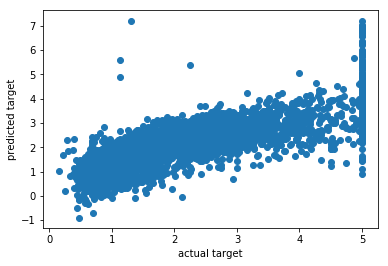

In [17]:
# Scatter the Actual and predicted target
plt.scatter(y_test, y_pred)
plt.xlabel("actual target")
plt.ylabel("predicted target")

# Make the table between 'actual' and 'predicted'
df = pd.DataFrame({'actual': y_test, 'predicted': y_pred})
df

# [Practice 1] : the boston house-prices dataset (regression)
### P1.1. You should fill in the blank between # and # with code

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import pandas as pd

In [19]:
# Load the diabetes dataset
boston = datasets.load_boston()
X, y = boston.data, boston.target

# Check the number of datasets and the number of features
#################################################
print(X.shape, y.shape)

#################################################

# Split the data and target into training dataset and test dataset
#################################################
######### Use random_state=2020 #################
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2020)
#################################################

(506, 13) (506,)


In [20]:
# Create Linear regression object
#################################################
regressor = linear_model.LinearRegression()
#################################################

# Train the model using the training sets
#################################################
regressor.fit(X_train, y_train)
#################################################

# Make predictions using the testing set
#################################################
y_pred = regressor.predict(X_test)
#################################################

In [21]:
# The coefficients and Intercept
#################################################
print("Coefficients: \n", regressor.coef_)
print("Intercept: \n", regressor.intercept_)
#################################################

# The mean squared error
#################################################
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
#################################################

# The coefficient of determination: 1 is perfect prediction
#################################################
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
#################################################

Coefficients: 
 [-1.13740821e-01  4.49502082e-02  2.42681718e-02  2.84667602e+00
 -1.55400898e+01  4.24455502e+00 -3.77065550e-03 -1.38478088e+00
  3.15558173e-01 -1.14081910e-02 -8.64703706e-01  9.79470828e-03
 -5.28446279e-01]
Intercept: 
 30.443678584361983
Mean squared error: 20.60
Coefficient of determination: 0.73


### P1.2. You should write down the formation between features(x1, x2, ...) and target

#### y(target) = ?
answer : y = 0.439x1 + 0.00969x2 - 0.105x3 + 0.632x4 - 0.00000368x5 - 0.00345x6 - 0.426x7 - 0.441x8 - 37.516

,Actual,Predicted
0,27.5,20.453141
1,20.5,20.076334
2,6.3,11.436957
3,24.8,30.886049
4,23.1,25.124478
5,14.5,18.141140
6,16.5,22.293933
7,15.0,26.367402
8,10.2,17.396249
9,22.3,27.201414


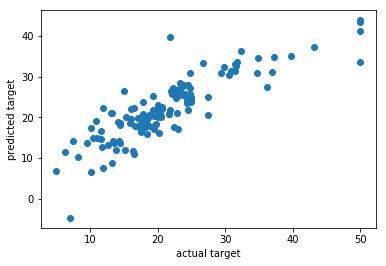

In [22]:
# Scatter the Actual and predicted target
plt.scatter(y_test, y_pred)
plt.xlabel("actual target")
plt.ylabel("predicted target")


# Make the table between 'actual' and 'predicted'
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df